The price of a 2000sqft house is: $815.00K


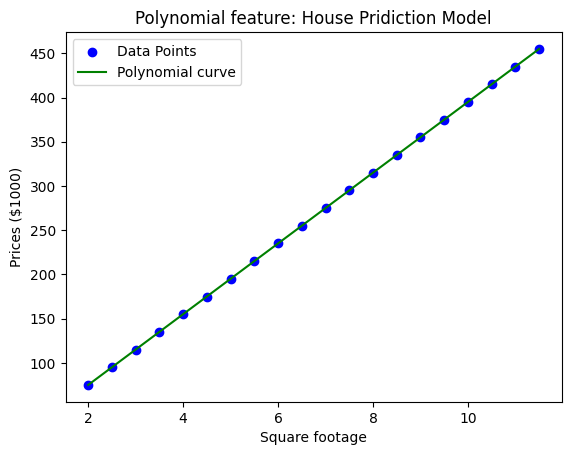

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# X: median income in ten-thousands of USD
X = np.array([
    2.0, 2.5, 3.0, 3.5, 4.0,
    4.5, 5.0, 5.5, 6.0, 6.5,
    7.0, 7.5, 8.0, 8.5, 9.0,
    9.5, 10.0, 10.5, 11.0, 11.5
]).reshape(-1, 1)

# y: median house value in thousands of USD
y = np.array([
    75, 95, 115, 135, 155,
    175, 195, 215, 235, 255,
    275, 295, 315, 335, 355,
    375, 395, 415, 435, 455
])

# Train model
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X, y)

# Predict 200sqft house
new_house = np.array([[20.5]])
y_pred = poly.predict(new_house)

print(f"The price of a 2000sqft house is: ${y_pred[0]:.2f}K")

# Visualize the polynomial curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, poly.predict(X), color='green', label='Polynomial curve')
plt.title("Polynomial feature: House Pridiction Model")
plt.xlabel('Square footage')
plt.ylabel('Prices ($1000)')
plt.legend()
plt.show()

In [45]:
import pandas as pd

# load data
boston = pd.read_csv("BostonHousing.csv")

X = boston.drop(columns=['medv'])
y = boston.age

# Train model
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X, y)

# Pridict
boston['Predicted Price'] = poly.predict(X)
print(f"New Price is: {boston['Predicted Price'][0]:.2f}")


New Price is: 65.20


In [42]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Predicted Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,65.2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,78.9
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,61.1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,45.8
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,54.2


In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
california = fetch_california_housing()

# Split data
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

# Train model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [72]:
# predict and accuracy
y_pred = poly_model.predict(X_test)
print(f"Polynomial Model Training set: {poly_model.score(X_train, y_train):.3f}")
print(f"Polynomial Model Testing set: {poly_model.score(X_test, y_test):.3f}")

Polynomial Model Training set: 0.685
Polynomial Model Testing set: 0.646
